In [1]:
import pandas as pd
# pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

C:\Users\kshang\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
form_sch_h = pd.read_csv("C:/dsge/form/form5500_sch_h_2019.csv")
form_sch_h.head()

,ACK_ID,SCH_H_PLAN_YEAR_BEGIN_DATE,SCH_H_TAX_PRD,SCH_H_PN,SCH_H_EIN,NON_INT_BEAR_CASH_BOY_AMT,EMPLR_CONTRIB_BOY_AMT,PARTCP_CONTRIB_BOY_AMT,OTHER_RECEIVABLES_BOY_AMT,INT_BEAR_CASH_BOY_AMT,...,COVERED_PBGC_INSURANCE_IND,TRUST_INCUR_UNREL_TAX_INC_IND,TRUST_INCUR_UNREL_TAX_INC_AMT,IN_SERVICE_DISTRIB_IND,IN_SERVICE_DISTRIB_AMT,FDCRY_TRUSTEE_CUST_NAME,FDCRY_TRUST_CUST_PHON_NUM,FDCRY_TRUST_CUST_PHON_NU_FORE,DISTRIB_MADE_EMPLOYEE_62_IND,PREMIUM_FILING_CONFIRM_NUMBER
0,20200102185355NAL0001369489001,1/1/2019,2/28/2019,1,330423631,NaN,6052.0,11773.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20200105115555NAL0003357953001,1/1/2019,3/14/2019,1,464678880,0.0,0.0,0.0,0.0,129564.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20200106120756NAL0009432114001,1/1/2019,10/15/2019,1,204524700,0.0,0.0,0.0,0.0,1032851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200106140727NAL0004669041001,1/1/2019,3/29/2019,2,264401097,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200106150118NAL0002365299001,1/1/2019,6/3/2019,1,900867867,0.0,0.0,0.0,0.0,1066850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
form_sch_h.describe(include=['object', 'bool'])

,ACK_ID,SCH_H_PLAN_YEAR_BEGIN_DATE,SCH_H_TAX_PRD,ACCOUNTANT_FIRM_NAME
count,89005,89005,89005,79804
unique,89005,261,375,17524
top,20201015134924NAL0008403681001,1/1/2019,12/31/2019,CLIFTONLARSONALLEN LLP
freq,1,84318,84339,1914


In [4]:
missing_data_perc = form_sch_h.isna().sum()/(len(form_sch_h))

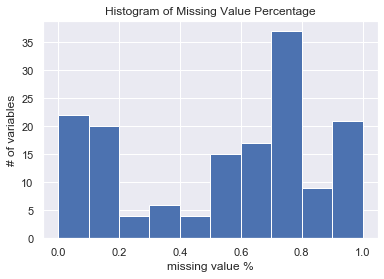

In [5]:
fig = plt.figure()
plt.hist(missing_data_perc, bins = 10)
plt.title("Histogram of Missing Value Percentage")
plt.xlabel("missing value %")
plt.ylabel("# of variables")
plt.show()

In [6]:
form_sch_h = form_sch_h.fillna(0)
form_sch_h = form_sch_h[form_sch_h['TOT_LIABILITIES_EOY_AMT'] > 0]
form_sch_h = form_sch_h[form_sch_h['NON_INT_BEAR_CASH_BOY_AMT'] >= 0]
form_sch_h.shape

(21768, 155)

In [7]:
form_sch_h = form_sch_h.drop_duplicates()
form_sch_h.shape

(21768, 155)

In [8]:
keep_cols = ['NON_INT_BEAR_CASH_BOY_AMT','EMPLR_CONTRIB_BOY_AMT','PARTCP_CONTRIB_BOY_AMT','OTHER_RECEIVABLES_BOY_AMT','INT_BEAR_CASH_BOY_AMT','GOVT_SEC_BOY_AMT','CORP_DEBT_PREFERRED_BOY_AMT','CORP_DEBT_OTHER_BOY_AMT','PREF_STOCK_BOY_AMT','COMMON_STOCK_BOY_AMT','JOINT_VENTURE_BOY_AMT','REAL_ESTATE_BOY_AMT','OTHER_LOANS_BOY_AMT','PARTCP_LOANS_BOY_AMT','INT_COMMON_TR_BOY_AMT','INT_POOL_SEP_ACCT_BOY_AMT','INT_MASTER_TR_BOY_AMT','INT_103_12_INVST_BOY_AMT','INT_REG_INVST_CO_BOY_AMT','INS_CO_GEN_ACCT_BOY_AMT','OTH_INVST_BOY_AMT','EMPLR_SEC_BOY_AMT','EMPLR_PROP_BOY_AMT','BLDGS_USED_BOY_AMT','TOT_ASSETS_BOY_AMT','BNFTS_PAYABLE_BOY_AMT','OPRTNG_PAYABLE_BOY_AMT','ACQUIS_INDBT_BOY_AMT','OTHER_LIAB_BOY_AMT','TOT_LIABILITIES_BOY_AMT','NET_ASSETS_BOY_AMT','NON_INT_BEAR_CASH_EOY_AMT','EMPLR_CONTRIB_EOY_AMT','PARTCP_CONTRIB_EOY_AMT','OTHER_RECEIVABLES_EOY_AMT','INT_BEAR_CASH_EOY_AMT','GOVT_SEC_EOY_AMT','CORP_DEBT_PREFERRED_EOY_AMT','CORP_DEBT_OTHER_EOY_AMT','PREF_STOCK_EOY_AMT','COMMON_STOCK_EOY_AMT','JOINT_VENTURE_EOY_AMT','REAL_ESTATE_EOY_AMT','OTHER_LOANS_EOY_AMT','PARTCP_LOANS_EOY_AMT','INT_COMMON_TR_EOY_AMT','INT_POOL_SEP_ACCT_EOY_AMT','INT_MASTER_TR_EOY_AMT','INT_103_12_INVST_EOY_AMT','INT_REG_INVST_CO_EOY_AMT','INS_CO_GEN_ACCT_EOY_AMT','OTH_INVST_EOY_AMT','EMPLR_SEC_EOY_AMT','EMPLR_PROP_EOY_AMT','BLDGS_USED_EOY_AMT','TOT_ASSETS_EOY_AMT','BNFTS_PAYABLE_EOY_AMT','OPRTNG_PAYABLE_EOY_AMT','ACQUIS_INDBT_EOY_AMT','OTHER_LIAB_EOY_AMT','TOT_LIABILITIES_EOY_AMT','NET_ASSETS_EOY_AMT','EMPLR_CONTRIB_INCOME_AMT','PARTICIPANT_CONTRIB_AMT','OTH_CONTRIB_RCVD_AMT','NON_CASH_CONTRIB_BS_AMT','TOT_CONTRIB_AMT','INT_BEAR_CASH_AMT','INT_ON_GOVT_SEC_AMT','INT_ON_CORP_DEBT_AMT','INT_ON_OTH_LOANS_AMT','INT_ON_PARTCP_LOANS_AMT','INT_ON_OTH_INVST_AMT','TOTAL_INTEREST_AMT','DIVND_PREF_STOCK_AMT','DIVND_COMMON_STOCK_AMT','REGISTERED_INVST_AMT','TOTAL_DIVIDENDS_AMT','TOTAL_RENTS_AMT','AGGREGATE_PROCEEDS_AMT','AGGREGATE_COSTS_AMT','TOT_GAIN_LOSS_SALE_AST_AMT','UNREALZD_APPRCTN_RE_AMT','UNREALZD_APPRCTN_OTH_AMT','TOT_UNREALZD_APPRCTN_AMT','GAIN_LOSS_COM_TRUST_AMT','GAIN_LOSS_POOL_SEP_AMT','GAIN_LOSS_MASTER_TR_AMT','GAIN_LOSS_103_12_INVST_AMT','GAIN_LOSS_REG_INVST_AMT','OTHER_INCOME_AMT','TOT_INCOME_AMT','DISTRIB_DRT_PARTCP_AMT','INS_CARRIER_BNFTS_AMT','OTH_BNFT_PAYMENT_AMT','TOT_DISTRIB_BNFT_AMT','TOT_CORRECTIVE_DISTRIB_AMT','TOT_DEEMED_DISTR_PART_LNS_AMT','TOT_INT_EXPENSE_AMT','PROFESSIONAL_FEES_AMT','CONTRACT_ADMIN_FEES_AMT','INVST_MGMT_FEES_AMT','OTHER_ADMIN_FEES_AMT','TOT_ADMIN_EXPENSES_AMT','TOT_EXPENSES_AMT','NET_INCOME_AMT','TOT_TRANSFERS_TO_AMT','TOT_TRANSFERS_FROM_AMT','ACCTNT_OPINION_TYPE_CD']
form_sch_h = form_sch_h[keep_cols]
form_sch_h.shape

(21768, 109)

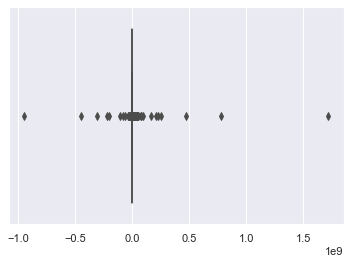

In [9]:
sns.boxplot(x=(form_sch_h['TOT_ASSETS_EOY_AMT']/form_sch_h['TOT_LIABILITIES_EOY_AMT']-form_sch_h['TOT_ASSETS_BOY_AMT']/form_sch_h['TOT_LIABILITIES_BOY_AMT']))

(21768,)


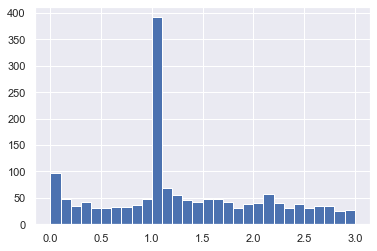

In [10]:
x = form_sch_h['TOT_ASSETS_EOY_AMT']/form_sch_h['TOT_LIABILITIES_EOY_AMT']
print(x.shape)
plt.hist(x,bins=30, range=[0, 3])
plt.show()

In [11]:
asset_boy = ['NON_INT_BEAR_CASH_BOY_AMT','EMPLR_CONTRIB_BOY_AMT','PARTCP_CONTRIB_BOY_AMT','OTHER_RECEIVABLES_BOY_AMT','INT_BEAR_CASH_BOY_AMT','GOVT_SEC_BOY_AMT','CORP_DEBT_PREFERRED_BOY_AMT','CORP_DEBT_OTHER_BOY_AMT','PREF_STOCK_BOY_AMT','COMMON_STOCK_BOY_AMT','JOINT_VENTURE_BOY_AMT','REAL_ESTATE_BOY_AMT','OTHER_LOANS_BOY_AMT','PARTCP_LOANS_BOY_AMT','INT_COMMON_TR_BOY_AMT','INT_POOL_SEP_ACCT_BOY_AMT','INT_MASTER_TR_BOY_AMT','INT_103_12_INVST_BOY_AMT','INT_REG_INVST_CO_BOY_AMT','INS_CO_GEN_ACCT_BOY_AMT','OTH_INVST_BOY_AMT','EMPLR_SEC_BOY_AMT','EMPLR_PROP_BOY_AMT','BLDGS_USED_BOY_AMT','TOT_ASSETS_BOY_AMT']

a = form_sch_h[asset_boy]
a['cash'] = a['NON_INT_BEAR_CASH_BOY_AMT']+a['INT_BEAR_CASH_BOY_AMT']
a['receivables'] = a['EMPLR_CONTRIB_BOY_AMT']+a['PARTCP_CONTRIB_BOY_AMT']+a['OTHER_RECEIVABLES_BOY_AMT']
a['govt bond'] = a['GOVT_SEC_BOY_AMT']
a['corp debt'] = a['CORP_DEBT_PREFERRED_BOY_AMT']+a['CORP_DEBT_OTHER_BOY_AMT']
a['public_equity'] = a['PREF_STOCK_BOY_AMT']+a['COMMON_STOCK_BOY_AMT']
a['real_estate'] = a['REAL_ESTATE_BOY_AMT']
a['loans'] = a['OTHER_LOANS_BOY_AMT']+a['PARTCP_LOANS_BOY_AMT']
a['employer inv'] = a['EMPLR_SEC_BOY_AMT']+a['EMPLR_PROP_BOY_AMT']
a['building'] = a['BLDGS_USED_BOY_AMT']
a['partnership'] = a['JOINT_VENTURE_BOY_AMT']
a['others'] = a['INT_COMMON_TR_BOY_AMT']+a['INT_POOL_SEP_ACCT_BOY_AMT']+a['INT_MASTER_TR_BOY_AMT']+a['INT_103_12_INVST_BOY_AMT']+a['INT_REG_INVST_CO_BOY_AMT']+a['INS_CO_GEN_ACCT_BOY_AMT']+a['OTH_INVST_BOY_AMT']
a['total asset'] = a['TOT_ASSETS_BOY_AMT']
b= a[['cash','receivables','govt bond','corp debt','public_equity','real_estate','loans','employer inv','building','partnership','others','total asset']]

C:\Users\kshang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kshang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kshang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [12]:
b = b[b['total asset']>1000]
b.describe()

,cash,receivables,govt bond,corp debt,public_equity,real_estate,loans,employer inv,building,partnership,others,total asset
count,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04,2.101900e+04
mean,1.609643e+07,9.377962e+06,3.586455e+07,3.940460e+07,9.907171e+07,4.292002e+06,2.651019e+06,1.115290e+07,4.290142e+04,1.575526e+07,3.053134e+08,5.390227e+08
std,3.284163e+08,1.046497e+08,5.075336e+08,3.831555e+08,1.094848e+09,1.797832e+08,3.819436e+07,2.109088e+08,1.181932e+06,2.146704e+08,1.829358e+09,2.745613e+09
min,-4.685482e+07,-6.314900e+04,0.000000e+00,-1.936966e+09,-2.656959e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.566736e+06,1.028000e+03
25%,0.000000e+00,4.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.474061e+06,5.462990e+06
50%,2.492500e+04,1.040460e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.216116e+06,2.336480e+07
75%,1.152114e+06,1.225106e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.531150e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.213642e+07,1.709832e+08
max,3.484618e+10,1.125064e+10,3.821237e+10,1.762261e+10,7.511431e+10,1.553113e+10,2.381248e+09,1.641346e+10,1.272020e+08,1.056745e+10,6.500721e+10,1.113820e+11


In [13]:
c = b[['cash','receivables','govt bond','corp debt','public_equity','real_estate','loans','employer inv','building','partnership','others']].div(b['total asset'], axis=0)
c.describe().to_csv('c.csv')

In [14]:
b[['cash','receivables','govt bond','corp debt','public_equity','real_estate','loans','employer inv','building','partnership','others']].sum(axis=0)/sum(b['total asset'])

cash             0.029862
receivables      0.017398
govt bond        0.066536
corp debt        0.073104
public_equity    0.183799
real_estate      0.007963
loans            0.004918
employer inv     0.020691
building         0.000080
partnership      0.029229
others           0.566420
dtype: float64

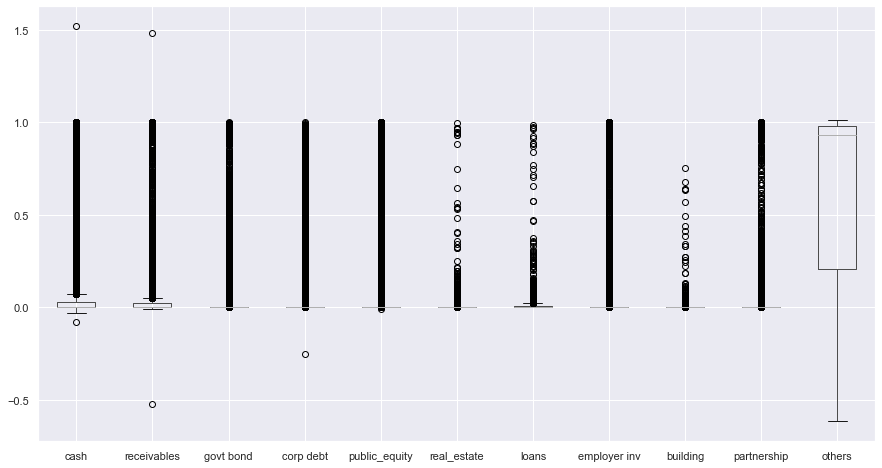

In [15]:
c.boxplot(figsize=(15,8))

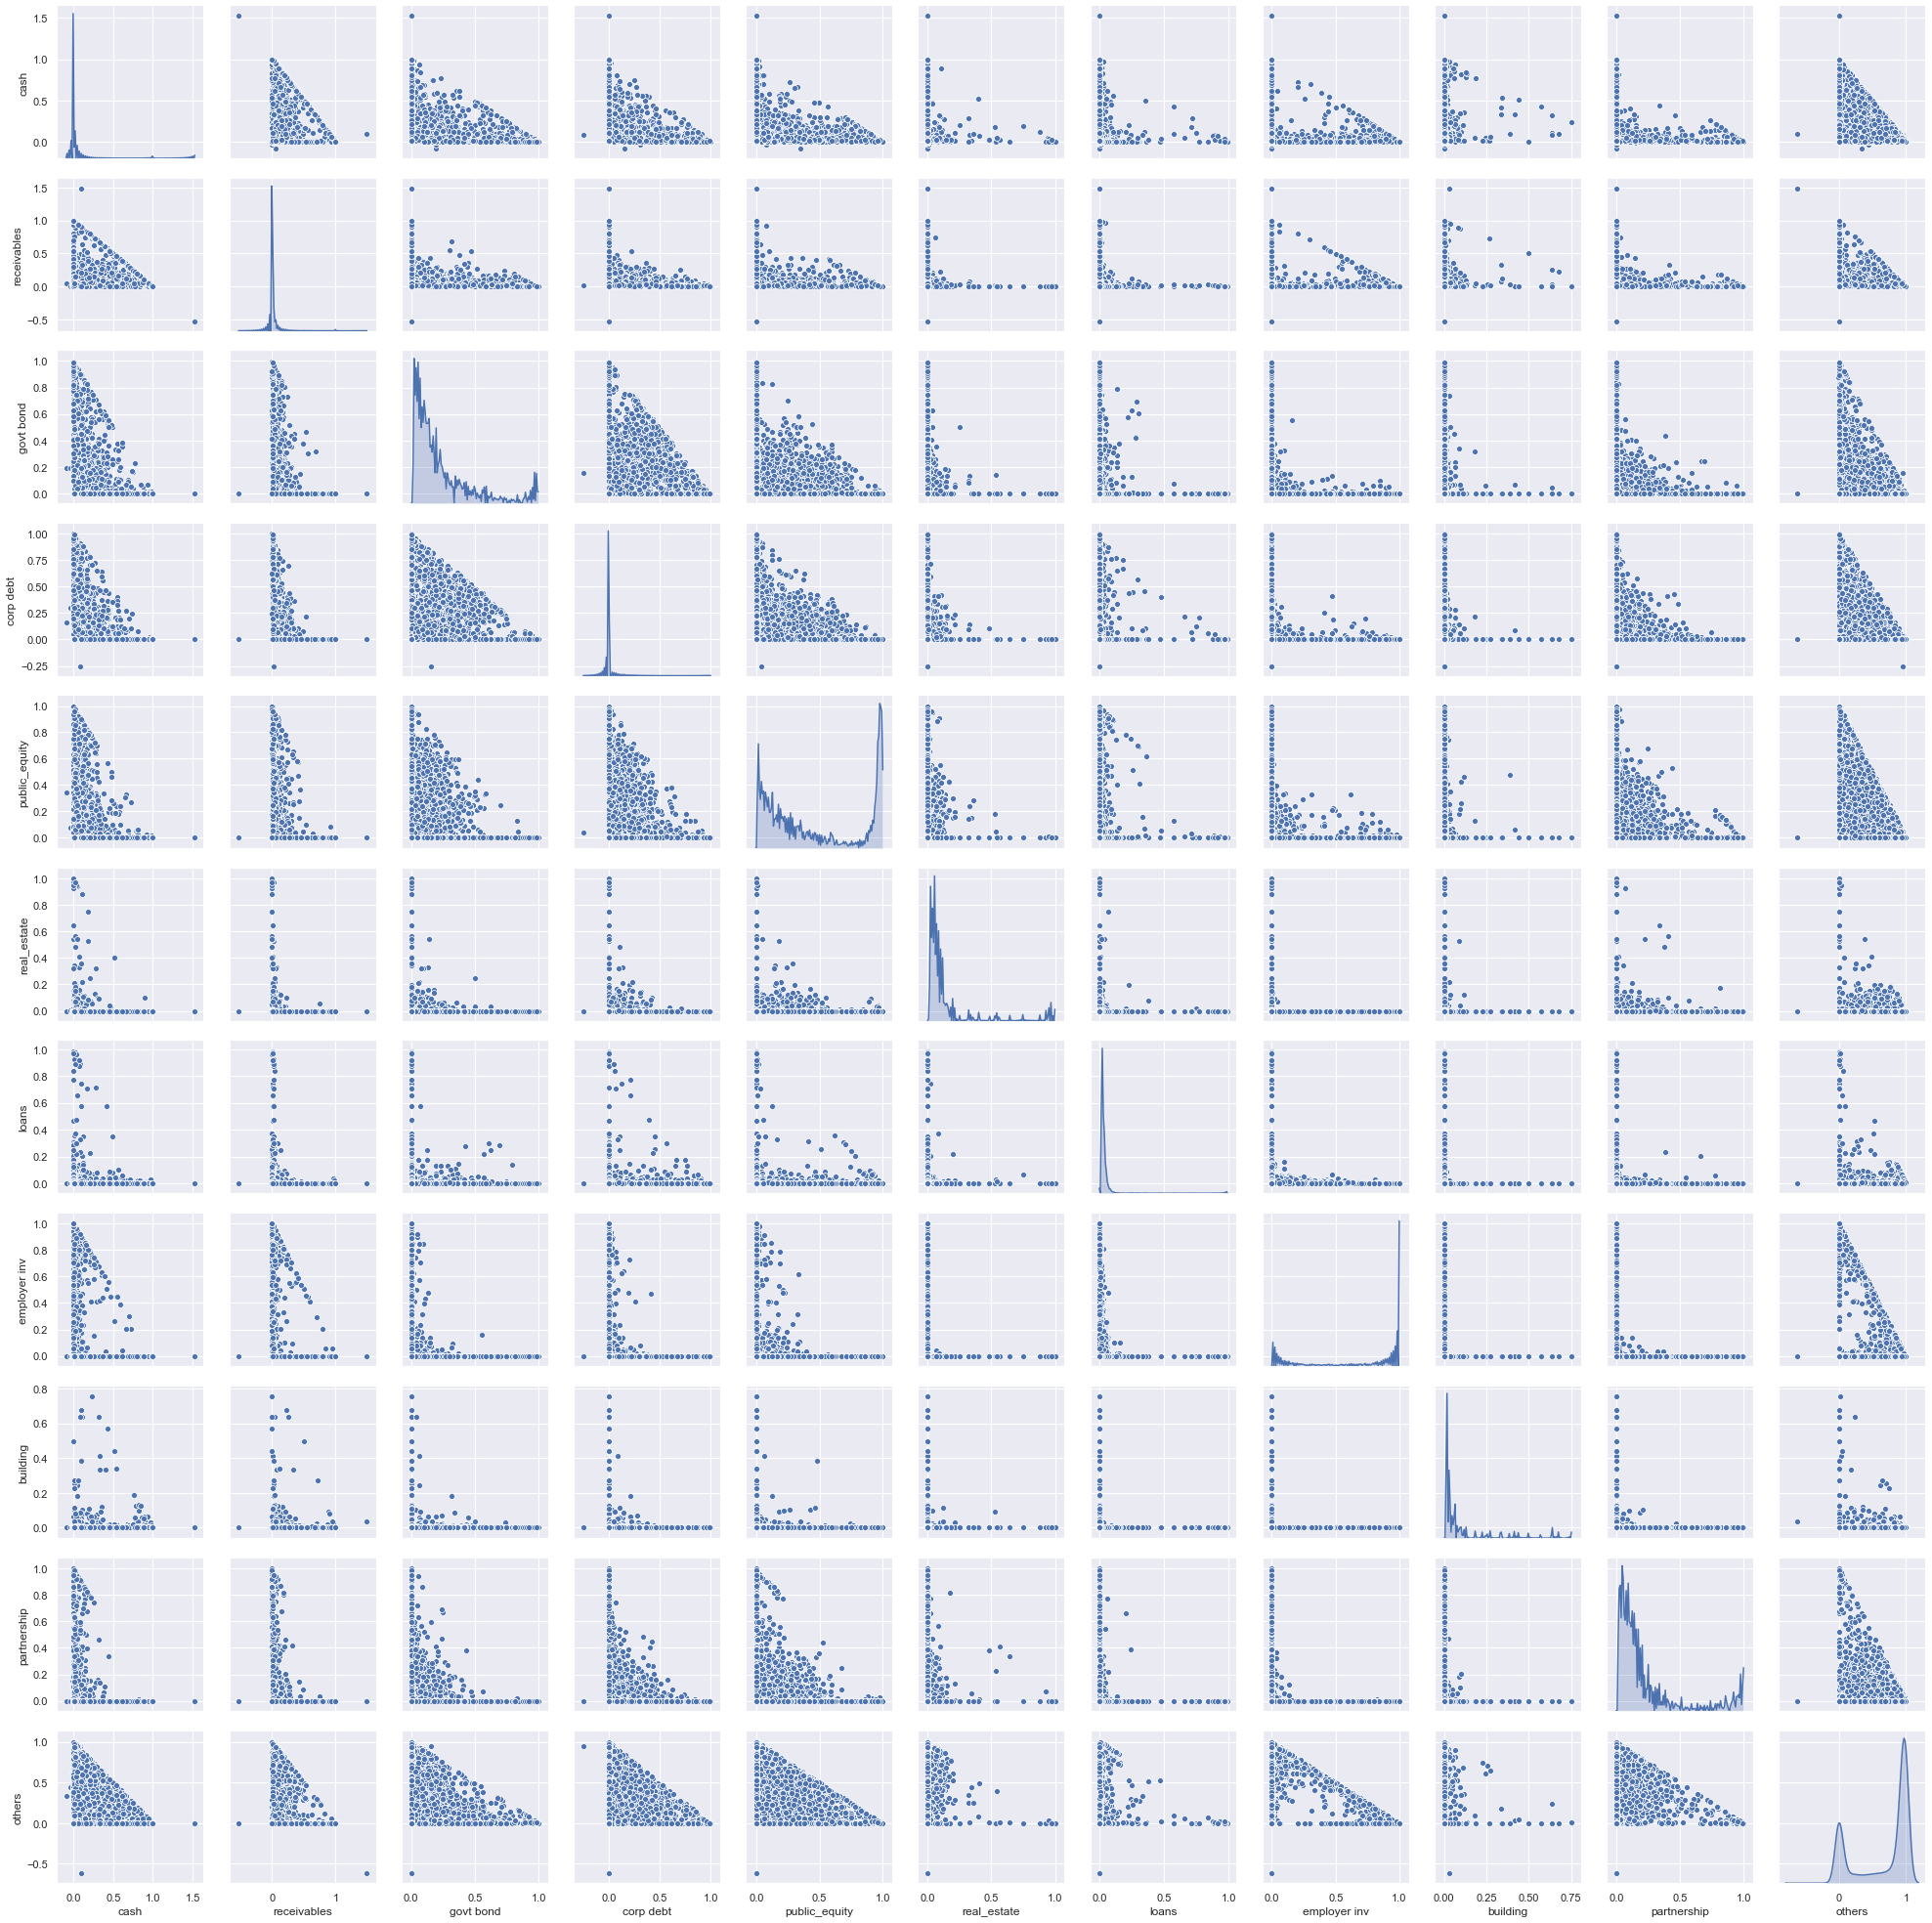

In [182]:
sns.pairplot(c, diag_kind="kde")

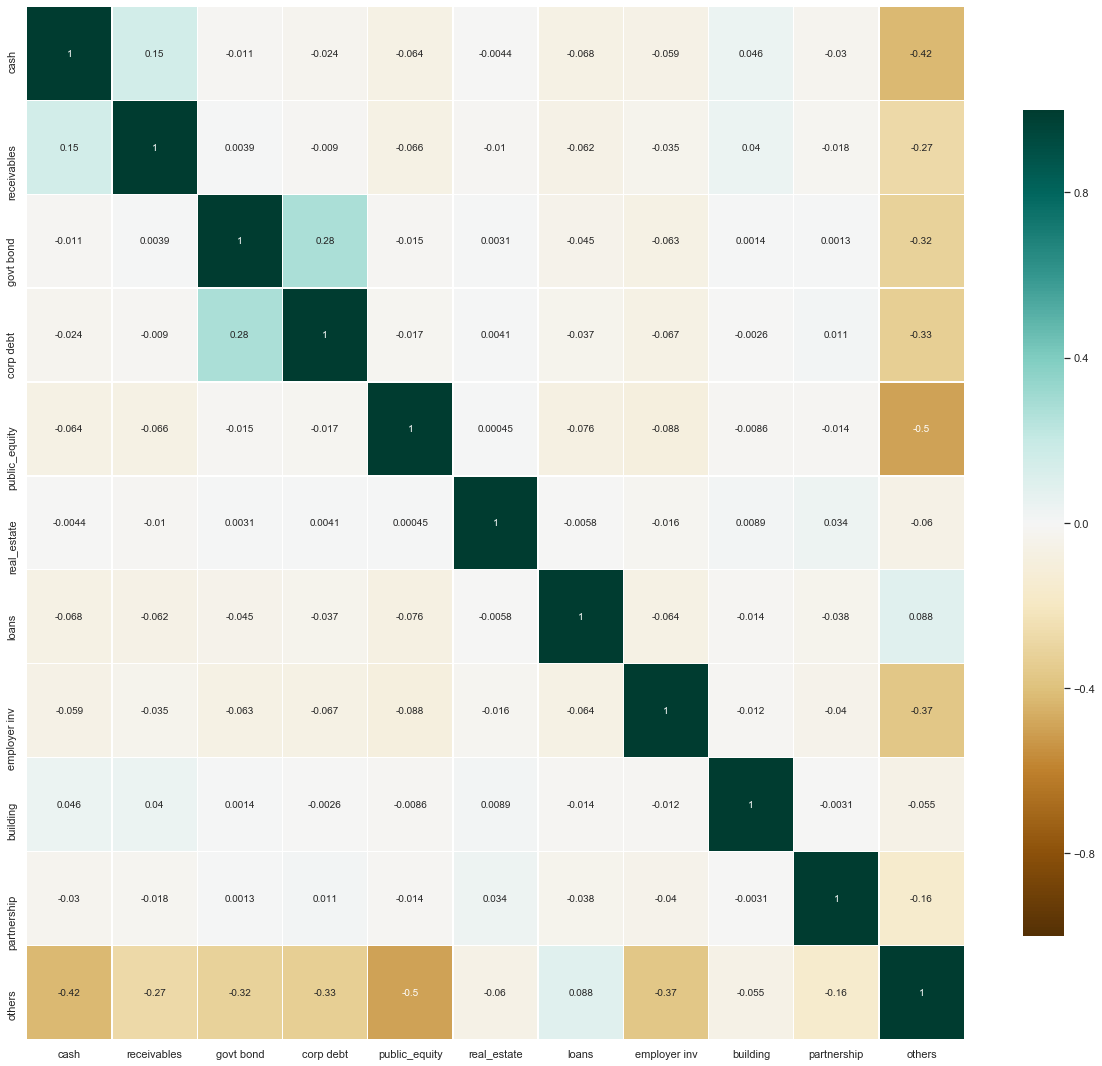

In [16]:
d = c.corr()

fig, ax = plt.subplots(figsize=(21, 19))
# plot heatmap
sns.heatmap(d, vmin=-1, vmax=1, annot=True, cmap='BrBG',
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

[[ 1.78070231e-01  5.82356013e-02  7.11575517e-02  8.37442094e-02
   3.20129196e-01  2.76685927e-03 -6.65877283e-03  1.72857742e-01
   1.51701725e-03  2.36347899e-02 -9.05454426e-01]
 [-2.71250422e-01 -7.44460105e-02 -3.39054388e-02 -3.97361405e-02
   8.06508826e-01 -4.51869260e-04  3.24472887e-04 -5.02098256e-01
  -1.48375464e-03 -8.06388845e-03  1.24602481e-01]
 [ 6.65100051e-01  1.15059877e-01  6.71964722e-02  7.72140645e-02
  -1.89315393e-01  1.77665056e-03  7.05362728e-04 -7.03821822e-01
   3.23575850e-03  1.31740668e-02 -5.03250883e-02]
 [-5.08296261e-01  6.63237216e-02  4.41019665e-01  6.05903799e-01
  -2.65239801e-01  5.88402349e-03  5.15029287e-03 -2.77409642e-01
   1.44895599e-04  7.62843865e-02 -1.49765080e-01]
 [-2.49438555e-01  8.77154072e-01 -8.41516872e-02 -3.59922735e-01
  -8.01433254e-02  3.36868848e-03 -1.70887690e-03 -1.11020868e-01
   4.65111141e-03  8.11357042e-02 -7.99235292e-02]
 [-5.90984342e-03 -1.72410221e-01  7.92055628e-01 -5.84519626e-01
  -2.06492183e-02  

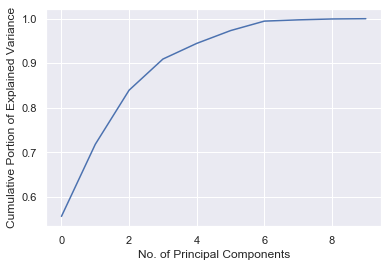

In [17]:
# boxplot = a['TOT_ASSETS_BOY_AMT'].boxplot(widths=0.5,vert=False)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(c)
pd.DataFrame(pca.components_).to_csv('pc_components.csv')
print(pca.components_, pca.explained_variance_)
X_pca = pca.transform(c)
print(sum(pca.explained_variance_ratio_[0:5]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative Portion of Explained Variance');